# Interactive Recommendation System with Word Embeddings using Word2Vec, Plotly, and NetworkX

## Project Breakdown
- Task 1: Introduction
- Task 2: Exploratory Data Analysis and Preprocessing
- Task 3: Word2Vec with Gensim
- Task 4: Exploring Results (you are here)
- Task 5: Building and Visualizing Interactive Network Graph

## Task 4: Exploring Results

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.word2vec import Word2Vec
import numpy as np

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#matplotlib.rcParams['figure.dpi'] = 800
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import random
random.seed(3)

In [3]:
model = Word2Vec.load('Data/w2v.model')

In [4]:
model.wv.most_similar(['orange'], topn=3)

[('tangerine', 0.889807939529419),
 ('lemon', 0.8392329812049866),
 ('clementine', 0.8005226850509644)]

In [5]:
with open('Data/items_for_sale.txt', 'r') as f:
    items_for_sale = f.read().split('\n')

In [6]:
items_for_sale[:3]

['salt', 'pepper', 'fresh']

In [7]:
words, vectors = [], []
for item in items_for_sale:
    try: 
        vectors.append(model.wv.get_vector(item))
        words.append(item)
    except KeyError:
        print(f'Word {item} not found in vocab -- panic!')

In [8]:
vectors[0]

array([ 3.7468237e-01,  1.7044319e+00,  8.4132999e-01,  1.1020718e-01,
       -3.0329552e+00, -1.0586220e+00,  2.0326965e+00, -7.3948997e-01,
        2.4169183e+00, -1.4566647e+00,  9.1566432e-01, -2.6076715e+00,
        3.6701026e+00,  3.4965899e+00, -1.7611297e-03,  3.2917905e-01,
        3.9786336e+00,  9.8336810e-01,  2.2042711e+00,  4.4151335e+00,
        1.9235830e-01, -7.2891247e-01,  6.9771552e-01,  7.5827993e-02,
       -7.0826286e-01,  1.4248675e+00,  3.3894017e+00,  2.0908537e+00,
        1.5428969e+00, -2.3408840e+00,  8.8016525e-02, -1.3120441e+00,
       -2.6398499e+00, -4.0145268e+00,  2.0274029e+00,  7.0151198e-01,
       -3.9117639e+00,  1.3692096e+00,  2.1565318e+00,  2.7141724e+00,
       -1.3082508e+00,  1.7286234e+00,  2.7718856e+00, -1.7078192e+00,
        3.1660289e-01, -5.0190341e-01,  5.3110726e-02, -1.7357268e+00,
        6.8376452e-02,  1.2014645e+00, -2.0137830e-01,  1.4649458e+00,
       -4.6017472e-02, -1.4305319e-01, -2.2926230e+00, -2.4173620e+00,
      

In [9]:
sims = cosine_similarity(vectors, vectors)

In [10]:
sims

array([[ 0.9999999 ,  0.3197011 ,  0.23220655, ..., -0.04702725,
         0.08721251, -0.08719747],
       [ 0.3197011 ,  1.0000001 ,  0.16114593, ..., -0.06167813,
         0.07575791, -0.1830217 ],
       [ 0.23220655,  0.16114593,  0.99999976, ...,  0.23353888,
         0.09099803,  0.03629347],
       ...,
       [-0.04702725, -0.06167813,  0.23353888, ...,  1.0000001 ,
         0.08758216,  0.03453456],
       [ 0.08721251,  0.07575791,  0.09099803, ...,  0.08758216,
         1.        ,  0.13861129],
       [-0.08719747, -0.1830217 ,  0.03629347, ...,  0.03453456,
         0.13861129,  1.0000004 ]], dtype=float32)

In [11]:
sims.shape

(911, 911)

In [12]:
for i in range(len(vectors)):
    for j in range(len(vectors)):
        if i<=j:
            sims[i, j] = False

In [13]:
k = 20
indices = list(range(len(vectors)))
random.shuffle(indices)

In [14]:
indices = indices[:k]

In [15]:
small_vectors = [vectors[i] for i in indices]
small_words = [words[i] for i in indices]

In [16]:
small_sims = cosine_similarity(small_vectors, small_vectors)

In [17]:
for x in range(len(small_vectors)):
    small_sims[x,x] = 0

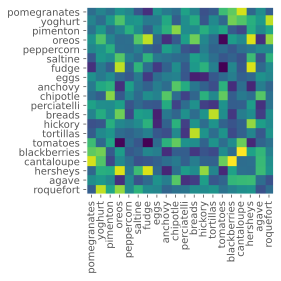

In [18]:
# adapted from https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html

fig, ax = plt.subplots()
im = ax.imshow(small_sims)

ax.set_xticks(np.arange(len(small_vectors)))
ax.set_yticks(np.arange(len(small_vectors)))

ax.set_xticklabels(small_words)
ax.set_yticklabels(small_words)
ax.grid(False)

plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

In [20]:
np.savetxt('Data/words.txt', words, fmt='%s')
np.save('Data/vectors.npy', vectors)